# Minimal example with TensorFlow 2.0
In this notebook we will recreate our machine learning algorithm using TF 2.0.

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=0.1,maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=0.1,maxval=0.1)
                                                 )
                
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 25.6072
Epoch 2/100
1000/1000 - 0s - loss: 1.2713
Epoch 3/100
1000/1000 - 0s - loss: 0.4333
Epoch 4/100
1000/1000 - 0s - loss: 0.4126
Epoch 5/100
1000/1000 - 0s - loss: 0.4079
Epoch 6/100
1000/1000 - 0s - loss: 0.4171
Epoch 7/100
1000/1000 - 0s - loss: 0.3977
Epoch 8/100
1000/1000 - 0s - loss: 0.3525
Epoch 9/100
1000/1000 - 0s - loss: 0.4139
Epoch 10/100
1000/1000 - 0s - loss: 0.3752
Epoch 11/100
1000/1000 - 0s - loss: 0.3997
Epoch 12/100
1000/1000 - 0s - loss: 0.3573
Epoch 13/100
1000/1000 - 0s - loss: 0.3823
Epoch 14/100
1000/1000 - 0s - loss: 0.4037
Epoch 15/100
1000/1000 - 0s - loss: 0.3793
Epoch 16/100
1000/1000 - 0s - loss: 0.3684
Epoch 17/100
1000/1000 - 0s - loss: 0.3816
Epoch 18/100
1000/1000 - 0s - loss: 0.3786
Epoch 19/100
1000/1000 - 0s - loss: 0.3753
Epoch 20/100
1000/1000 - 0s - loss: 0.4055
Epoch 21/100
1000/1000 - 0s - loss: 0.3600
Epoch 22/100
1000/1000 - 0s - loss: 0.4109
Epoch 23/100
1000/1000 - 0s - loss: 0.37

## Extract the weight and bias

In [5]:
model.layers[0].get_weights()

[array([[ 1.9930829],
        [-3.0356522]], dtype=float32), array([5.000332], dtype=float32)]

In [6]:
weights=model.layers[0].get_weights()[0]
weights

array([[ 1.9930829],
       [-3.0356522]], dtype=float32)

In [7]:
bias=model.layers[0].get_weights()[1]
bias

array([5.000332], dtype=float32)

## Extract the outputs(make predictions)

In [8]:
model.predict_on_batch(training_data['inputs'])

<tf.Tensor: id=6822, shape=(1000, 1), dtype=float32, numpy=
array([[ 40.742275  ],
       [ 36.187004  ],
       [-13.263393  ],
       [-30.766914  ],
       [-15.860401  ],
       [  4.1716857 ],
       [ -0.67092705],
       [  4.0195036 ],
       [-37.216938  ],
       [ 36.432888  ],
       [ 23.600405  ],
       [ 22.28259   ],
       [ -8.782515  ],
       [  1.6592536 ],
       [  6.1633816 ],
       [-31.122326  ],
       [ -5.166895  ],
       [  1.1220264 ],
       [-11.033831  ],
       [-16.851948  ],
       [ 25.484768  ],
       [ 30.684093  ],
       [ 26.103937  ],
       [-26.164986  ],
       [ -3.669012  ],
       [ 43.442265  ],
       [ 26.277098  ],
       [-13.080889  ],
       [ 25.067019  ],
       [ 12.442562  ],
       [ 24.038036  ],
       [ 37.930134  ],
       [ 18.886555  ],
       [ 19.35991   ],
       [  4.195347  ],
       [  2.6241093 ],
       [ 22.714605  ],
       [-23.16566   ],
       [ 28.99892   ],
       [ 22.87518   ],
       [ 20.37312   

In [9]:
training_data['targets'].round(1)

array([[ 40.6],
       [ 35.9],
       [-13.7],
       [-30.9],
       [-16.1],
       [  4.8],
       [ -0.1],
       [  4.5],
       [-37.1],
       [ 36.2],
       [ 23. ],
       [ 22.6],
       [ -9.5],
       [  2.2],
       [  6. ],
       [-31.7],
       [ -5.1],
       [  0.1],
       [-10.3],
       [-15.9],
       [ 24.4],
       [ 29.7],
       [ 26.1],
       [-25.9],
       [ -3.6],
       [ 43.3],
       [ 26. ],
       [-13.8],
       [ 24.9],
       [ 13.4],
       [ 24.9],
       [ 37.1],
       [ 19.7],
       [ 19.6],
       [  4.3],
       [  3.3],
       [ 22.1],
       [-23.7],
       [ 29.8],
       [ 22.1],
       [ 20.5],
       [-11.6],
       [ 25.5],
       [ 20.5],
       [ 30.1],
       [ -6.2],
       [ 17.8],
       [-21.9],
       [  9.8],
       [  9.9],
       [ 40.4],
       [-18.3],
       [ -4.8],
       [-29.1],
       [-35.4],
       [ -3. ],
       [ 38.9],
       [ 25.4],
       [ 22.3],
       [ 30.7],
       [ 20.5],
       [-27.1],
       [

## Plotting the data

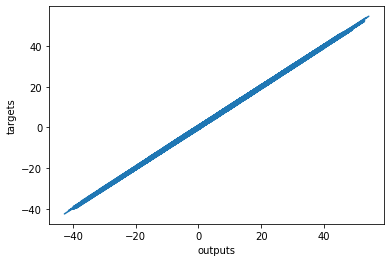

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()